<a href="https://colab.research.google.com/github/himalayahall/DATA602/blob/main/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

Imports

In [131]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

Load Iris dataset

In [132]:
iris_data = ds.load_iris(as_frame=True)

View Iris dataset features and target

In [133]:
iris_data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [134]:
def first_five_rows_and_target_names():
  return iris_data.frame[0:5], iris_data.target_names

print(first_five_rows_and_target_names())


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  , array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [135]:
def do_KNN(new_observations):

  # extract features (X) and target (y)
  X = iris_data.frame.drop('target', axis = 1)
  y = iris_data.frame.target

  # Create model
  knn = KNN(n_neighbors=5)

  # Fit model
  knn.fit(X, y)

  # Generate predictions
  predictions = knn.predict(new_observations)

  # Convert numeric predictions to target labels
  target_labels = [iris_data.target_names[pred] for pred in predictions]
  return target_labels

Create a set of new observations. Do KNN predictions for new observations.

In [136]:
new_observations = [[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3], [5.1, 3.5, 1.4, 0.2]]
do_KNN(new_observations=new_observations)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['setosa', 'virginica', 'setosa']

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [137]:
from sklearn.model_selection import train_test_split


def do_split(split : float):
  X = iris_data.frame.drop('target', axis = 1).values
  y = iris_data.frame.target.values.reshape(-1, 1)
  return train_test_split(X, y, test_size=split, random_state=42, stratify=y)


def do_KNN_with_split(split : float, neighbors : int):
  X_train, X_test, y_train, y_test = do_split(split)

  knn = KNN(n_neighbors=neighbors)
  knn.fit(X_train, y_train)

  predict = knn.predict(X_test)
  return knn.score(X_test, y_test)


In [138]:
  X = iris_data.frame.drop('target', axis = 1).values
  y = iris_data.frame.target.values.reshape(-1, 1)
  do_KNN_with_split(0.3, 5)
  #print(X.shape, y. shape)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9777777777777777

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

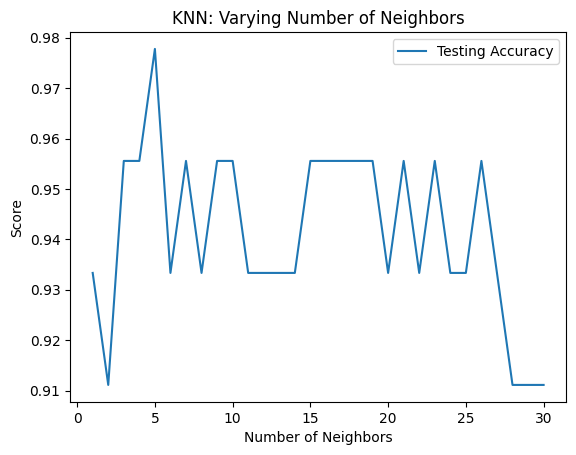

In [139]:
neighbors = np.arange(1, 31)
test_accuracies = {}
X_train, X_test, y_train, y_test = do_split(0.3)

for n in neighbors:
  knn = KNN(n_neighbors=n)
  knn.fit(X_train, y_train)
  test_accuracies[n] = knn.score(X_test, y_test)


# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")

# Display the plot
plt.show()


**Q5** 

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

The Boston dataset has been removed from Sklean. However, we can still load it using the strategy outlined aboveby Sklearn - if you try to load the Boston dataset the error will provide strategy details.

In [140]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
raw_df.head()
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


The dataframe is manged. Specifically, each row has been split in two. For example, the first input row has been split into rows 0 and 1, second row h as been split into rows 3 an 4, and so on.

Let's repair the dataset as follows: split the dataset into two. First split dataset will contain odd numbered rows [1, 3, 5, ...] and the second split will contain even numbered rows [2, 4, 6, ...].

In [141]:
odds = raw_df[1::2][['CRIM', 'ZN', 'INDUS']]
odds.columns = ['B', 'LSTAT', 'MEDV']
print(odds.head())

evens = raw_df[0::2]
print(evens.head())

        B  LSTAT  MEDV
1  396.90   4.98  24.0
3  396.90   9.14  21.6
5  392.83   4.03  34.7
7  394.63   2.94  33.4
9  396.90   5.33  36.2
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3
2  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8
4  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8
6  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7
8  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7


Reindex both splits

In [142]:
odds = odds.reset_index() 
print(odds.head())

evens = evens.reset_index()
print(evens.head())

   index       B  LSTAT  MEDV
0      1  396.90   4.98  24.0
1      3  396.90   9.14  21.6
2      5  392.83   4.03  34.7
3      7  394.63   2.94  33.4
4      9  396.90   5.33  36.2
   index     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0      0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1      2  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2      4  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3      6  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4      8  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  
0     15.3  
1     17.8  
2     17.8  
3     18.7  
4     18.7  


Concat the splits. Now we have the full Boston dataset.

In [143]:
df = pd.concat([evens, odds], axis=1)
df.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,index,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,1,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,3,396.90,9.14,21.6
2,4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5,392.83,4.03,34.7
3,6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,7,394.63,2.94,33.4
4,8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,9,396.90,5.33,36.2


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

In [144]:
X = df['PTRATIO'].values
X = X.reshape(-1, 1)
print(type(X))

y = df['MEDV'].values
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


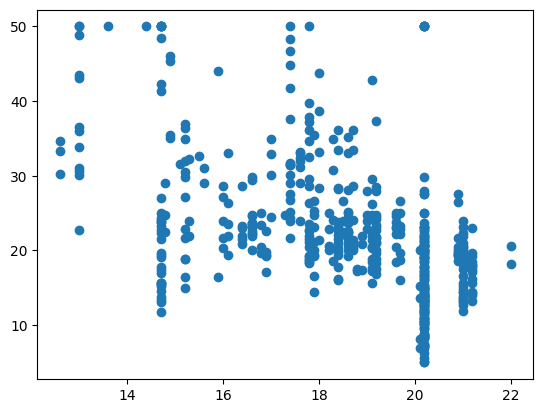

In [145]:
plt.scatter(x=X, y=y)


**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

[[12.6       ]
 [13.64444444]
 [14.68888889]
 [15.73333333]
 [16.77777778]
 [17.82222222]
 [18.86666667]
 [19.91111111]
 [20.95555556]
 [22.        ]]


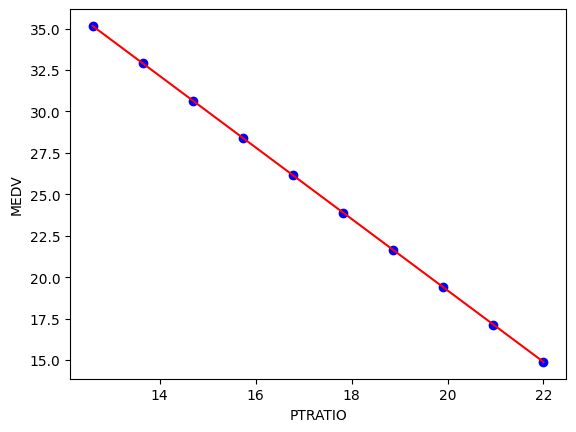

In [146]:
from sklearn.linear_model import LinearRegression

# create linrear regression model
lreg = LinearRegression()

# fit model to actual data
lreg.fit(X=X, y=y)

# generate test (PTRATIO) data
x_test = np.linspace(min(X), max(X), 10)
print(x_test)

# predict y
predictions = lreg.predict(x_test)

# Create scatter plot
plt.scatter(x_test, predictions, color="blue")

# Plot linear regression line 
plt.plot(x_test, predictions, color='red')

# Set plot labels
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

# Display plot
plt.show()
